# Introduction

The popularity of online gaming has opened up a new realm of opportunities for researchers to learn more about their players and use this data to optimize the overall experience. A group of Computer Science (CS) students at UBC are trying to investigate player behaviour patterns by tracking their activity on an online server of Minecraft, a popular sandbox game. Players can harvest raw materials, extract resources, craft tools, create structures and go on a quest to kill a dragon as well. 

The researcher's aim is to gather player data by hosting them on UBC servers and record the data to answer key questions like: 
- What kinds of players tend to play the most?
- Demand forecasting: when do the most players tend to play?
- Can we tell whether a player will continue to contribute given past play sessions and demographics?

Our project aims to answer the question “What kinds of players tend to play the most?”. To answer this question, we used two datasets: 
1. Players Dataset (players.csv)- Includes demographic and skill information about players, such as their experience level, subscription status, gender, and age.
2. Sessions Dataset (sessions.csv)- Contains records of individual play sessions, including session start and end times.
The response variable chosen is ‘played_hours’, which measures the total number of hours a player spent on the game. Explanatory variables such as ‘experience’, ‘gender’, ‘subscribe’ and ‘age’ are used to identify any trends or patterns that emerge concerning player engagement. The study aims to provide actionable insights for recruitment and server management strategies while contributing to a broader understanding of player behaviour in online gaming.           


# Method

To address our research question, we performed a series of steps that start with loading the dataset, performing wrangling when required, exploratory analysis and exploratory visualisation, building of a regression model, analysis of the model and visualisation of the results. 
1. Loading the dataset- we begin by loading the necessary libraries and the datasets to our project file. 

In [10]:
#Loading libraries 

set.seed(1234)
library (tidyverse)
library(lubridate)

#Loading the dataset 

players_url<- "https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz"
players_data<- read_csv(players_url)

sessions_url<-"https://drive.google.com/uc?export=download&id=14O91N5OlVkvdGxXNJUj5jIsV5RexhzbB"
sessions_data<- read_csv(sessions_url)

glimpse(players_data)  
glimpse(sessions_data)  


summary(players_data)   
summary(sessions_data) 

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 196
Columns: 9
$ experience       <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "A…
$ subscribe        <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRU…
$ hashedEmail      <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee97…
$ played_hours     <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.…
$ name             <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Ad…
$ gender           <chr> "Male", "Male", "Male", "Female", "Male", "Female", "…
$ age              <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 17, 22, 23, 17, 25, 22…
$ individualId     <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ organizationName <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
Rows: 1,535
Columns: 5
$ hashedEmail         <chr> "bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8a…
$ start_time          <chr> "30/06/2024 18:12", "17/06/2024 23:33", "25/07/202…
$ end_time            <chr> "30/06/2024 18:24", "17/06/2024 23:46", "25/07/2

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
     name              gender               age        individualId  
 Length:196         Length:196         Min.   : 8.00   Mode:logical  
 Class :character   Class :character   1st Qu.:17.00   NA's:196      
 Mode  :character   Mode  :character   Median :19.00                 
                                       Mean   :21.28                 
                                       3rd Qu.:22.00                 
                                       Max.   :99.00                 

 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

2. Data Wrangling and cleaning:

The datasets contained information useful to our question, but preprocessing steps are further required to convert them into tidy datasets.

a) Checking for any missing values in all variables

b) Removed IndividualID and organisationname due to missing values 

c) Converting start time and end time variables into appropriate format, suitable for analysis

d) Summarizing the dataset after cleaning, with descriptions to make interpretation easy


In [11]:
#Identifying and formatting columns


players_columns <- tibble(
  Variable = names(players_data),
  Type = sapply(players_data, class)
)
sessions_columns <- tibble(
  Variable = names(sessions_data),
  Type = sapply(sessions_data, class)
)


print(players_columns)
print(sessions_columns)
# Check for missing values in players_data
players_missing <- players_data |>
  summarize(across(everything(), ~ sum(is.na(.))))

print("Missing values in players data:")
players_missing

# Check for missing values in sessions_data
sessions_missing <- sessions_data |>
  summarize(across(everything(), ~ sum(is.na(.))))

print("Missing values in sessions data:")
sessions_missing



# Checking for invalid played_hours values in players_data
invalid_played_hours <- players_data |>
  filter(played_hours < 0)

print("Invalid values in played_hours (players_data):")
invalid_played_hours

# Checking for unrealistic age values in players_data
unrealistic_ages <- players_data |>
  filter(age < 0 | age > 100)

print("Unrealistic ages in players_data:")
unrealistic_ages


# Drop columns with all missing values in players_data
players_data <- players_data |>
  select(-individualId, -organizationName)


# Remove rows with missing start and end times in sessions_data (if appropriate)
sessions_data <- sessions_data |>
  filter(!is.na(original_start_time) & !is.na(original_end_time))





# Convert date-time columns
sessions_data <- sessions_data |>
  mutate(
    start_time = dmy_hm(start_time),
    end_time = dmy_hm(end_time)
  )

sessions_data <- sessions_data |>
  mutate(
    day = day(start_time),
    month = month(start_time),
    year = year(start_time),
    hour = hour(start_time),
    minute = minute(start_time)
  )

# Calculate session duration in minutes
sessions_data <- sessions_data |>
  mutate(
    session_duration_minutes = as.numeric(difftime(end_time, start_time, units = "mins"))
  )


glimpse(sessions_data)





players_summary <- tibble(
  Variable = c("experience", "subscribe", "hashedEmail", "played_hours", "name", 
               "gender", "age", "individualId", "organizationName"),
  Type = c("character", "logical", "character", "numeric", "character", 
           "character", "numeric", "logical", "logical"),
  Description = c(
    "Player's experience level (e.g., Pro, Veteran)",
    "Whether the player is subscribed (TRUE/FALSE)",
    "Hashed email identifier for each player",
    "Total hours played by the player",
    "Player's name",
    "Player's gender",
    "Player's age",
    "Individual ID for player (mostly missing)",
    "Organization name if applicable (mostly missing)"
  )
)
players_summary


sessions_summary <- tibble(
  Variable = c("hashedEmail", "start_time", "end_time", "original_start_time", "original_end_time"),
  Type = c("character", "character (converted to date-time)", 
           "character (converted to date-time)", "numeric", "numeric"),
  Description = c(
    "Hashed email identifier for each player",
    "Session start time in format DD/MM/YYYY HH:MM",
    "Session end time in format DD/MM/YYYY HH:MM",
    "Original start time (Unix timestamp)",
    "Original end time (Unix timestamp)"
  )
)

sessions_summary




#### Sessions Data

#- Key Observations:
#  - `start_time` and `end_time` were converted to date-time format.
#  - Extracted components (day, month, year, hour, minute) from `start_time` for additional analysis.
#  - Calculated `session_duration_minutes` to measure the duration of each play session.

#### Potential Issues
#- Missing Values: Original columns `individualId` and `organizationName` in `players_data` had only missing values, 
#so they were removed. `sessions_data` had 2 missing values in `original_start_time` and `original_end_time`,
#and rows with missing values were filtered out.






#The following is a summary of the datasets

#experience: Describes the skill or familiarity level of the player
#subscribe: Indicates whether the player is subscribed
#hashedEmail: This is an anonymized identifier for each player, used to maintain privacy
#played_hours: This variable measures the total hours played by the player, serving as the primary indicator of player engagement
#name: Player’s name, which serves as an identifier but doesn’t provide analytical value in terms of understanding player behaviour
#gender: Records the player’s gender
#age: Represents the age of the player
#individualId and organizationName: These variables are entirely or mostly missing across observations

#Missing Values:
#individualId and organizationName are completely or mostly missing. They appear to be irrelevant for analysis and can be excluded.

#Outliers
#played_hours and age seem to contain outliers  These outliers could impact the model, so it will be important to visualize this variable 


#Player Anonymity: Variables like hashedEmail are used for anonymity, which is good for privacy 
#Potential Sampling Bias: The dataset might not represent the entire player base. If only active or highly engaged players are represented, the data may overestimate typical engagement levels.
#Time-Dependent Factors: Since played_hours is a cumulative metric, it doesn’t account for when players played (e.g., recently or over a longer period).


# A tibble: 9 × 2
  Variable         Type     
  <chr>            <chr>    
1 experience       character
2 subscribe        logical  
3 hashedEmail      character
4 played_hours     numeric  
5 name             character
6 gender           character
7 age              numeric  
8 individualId     logical  
9 organizationName logical  
# A tibble: 5 × 2
  Variable            Type     
  <chr>               <chr>    
1 hashedEmail         character
2 start_time          character
3 end_time            character
4 original_start_time numeric  
5 original_end_time   numeric  
[1] "Missing values in players data:"


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0,196,196


[1] "Missing values in sessions data:"


hashedEmail,start_time,end_time,original_start_time,original_end_time
<int>,<int>,<int>,<int>,<int>
0,0,2,0,2


[1] "Invalid values in played_hours (players_data):"


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>


[1] "Unrealistic ages in players_data:"


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>


Rows: 1,533
Columns: 11
$ hashedEmail              <chr> "bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f4…
$ start_time               <dttm> 2024-06-30 18:12:00, 2024-06-17 23:33:00, 20…
$ end_time                 <dttm> 2024-06-30 18:24:00, 2024-06-17 23:46:00, 20…
$ original_start_time      <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.7218…
$ original_end_time        <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.7218…
$ day                      <int> 30, 17, 25, 25, 25, 23, 15, 21, 21, 16, 3, 30…
$ month                    <dbl> 6, 6, 7, 7, 5, 6, 4, 9, 6, 5, 7, 7, 8, 8, 5, …
$ year                     <dbl> 2024, 2024, 2024, 2024, 2024, 2024, 2024, 202…
$ hour                     <int> 18, 23, 17, 3, 16, 15, 7, 2, 2, 5, 1, 15, 2, …
$ minute                   <int> 12, 33, 34, 22, 1, 8, 12, 13, 31, 13, 31, 15,…
$ session_duration_minutes <dbl> 12, 13, 23, 36, 11, 122, 9, 17, 18, 39, 4, 28…


Variable,Type,Description
<chr>,<chr>,<chr>
experience,character,"Player's experience level (e.g., Pro, Veteran)"
subscribe,logical,Whether the player is subscribed (TRUE/FALSE)
hashedEmail,character,Hashed email identifier for each player
played_hours,numeric,Total hours played by the player
name,character,Player's name
gender,character,Player's gender
age,numeric,Player's age
individualId,logical,Individual ID for player (mostly missing)
organizationName,logical,Organization name if applicable (mostly missing)


Variable,Type,Description
<chr>,<chr>,<chr>
hashedEmail,character,Hashed email identifier for each player
start_time,character (converted to date-time),Session start time in format DD/MM/YYYY HH:MM
end_time,character (converted to date-time),Session end time in format DD/MM/YYYY HH:MM
original_start_time,numeric,Original start time (Unix timestamp)
original_end_time,numeric,Original end time (Unix timestamp)


3. Exploratory Data Analysis

The next step for us was to perform some exploratory analysis to try and understand if certain variables had a correlation with the number of hours played. This will help us identify what kind of model should we build for our project and what variables to select. 

**Histogram of played_hours**

This plot highlights the distribution of gameplay hours, showing that most players contributed a small number of hours, with a few high-contributors. 



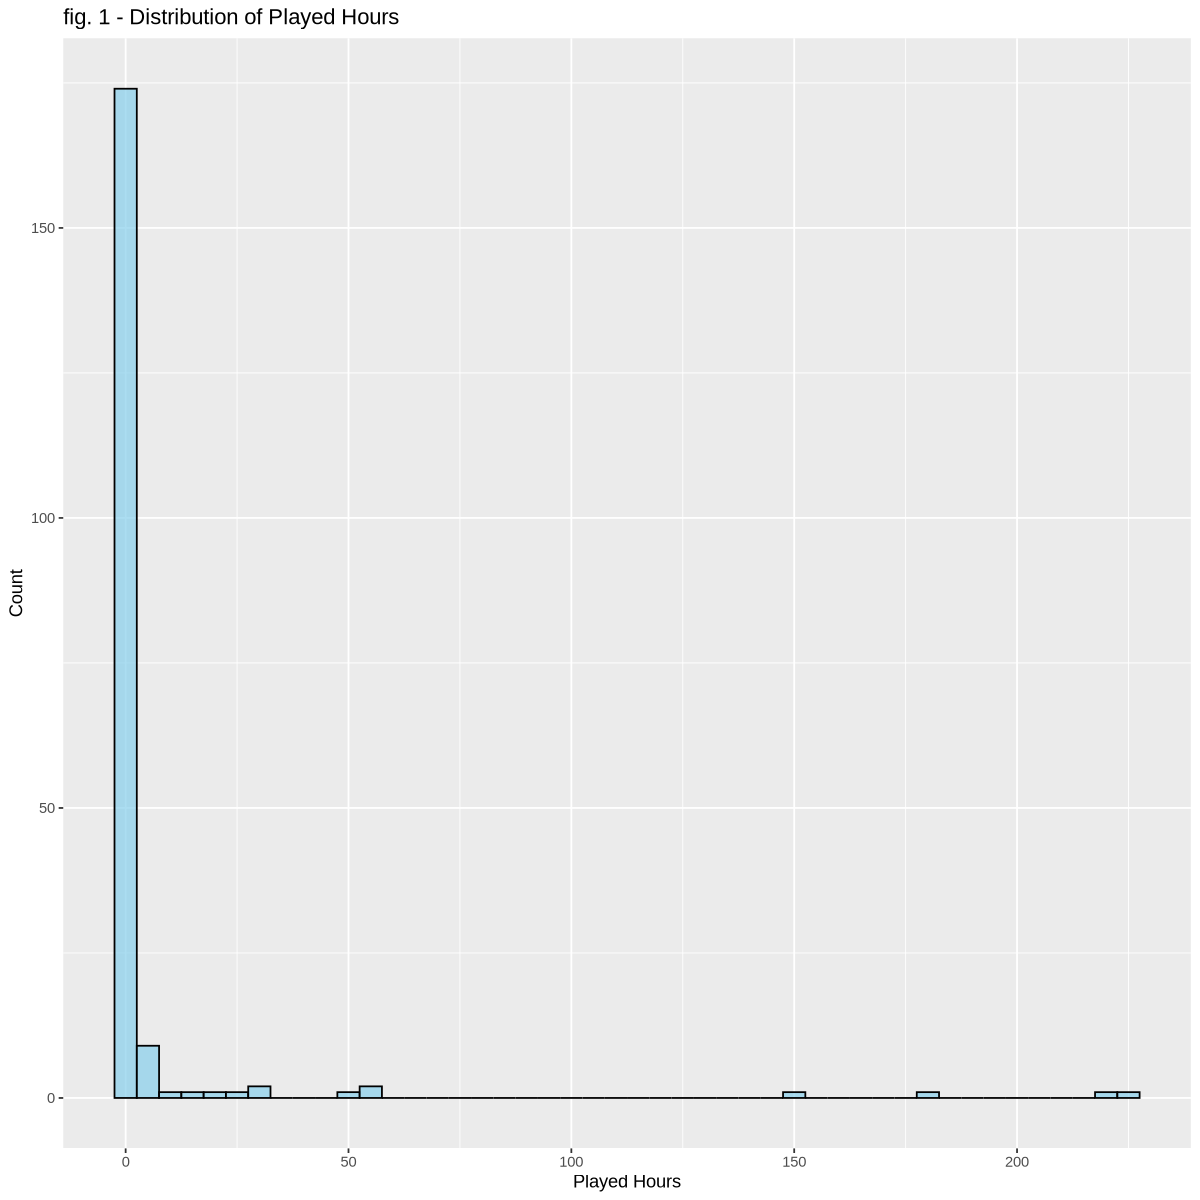

In [19]:
hours_hist<-ggplot(players_data, aes(x = played_hours)) +
  geom_histogram(binwidth = 5, fill = "skyblue", color = "black", alpha = 0.7) +
  labs(title = "fig. 1 - Distribution of Played Hours",
       x = "Played Hours",
       y = "Count") 
hours_hist

**Bar Graph of players’  experience**

This plot shows us what proportion of players have played Minecraft prior to participating in the study. This allows us to understand what kinds of players are more likely to contribute to further research by spending more time playing 


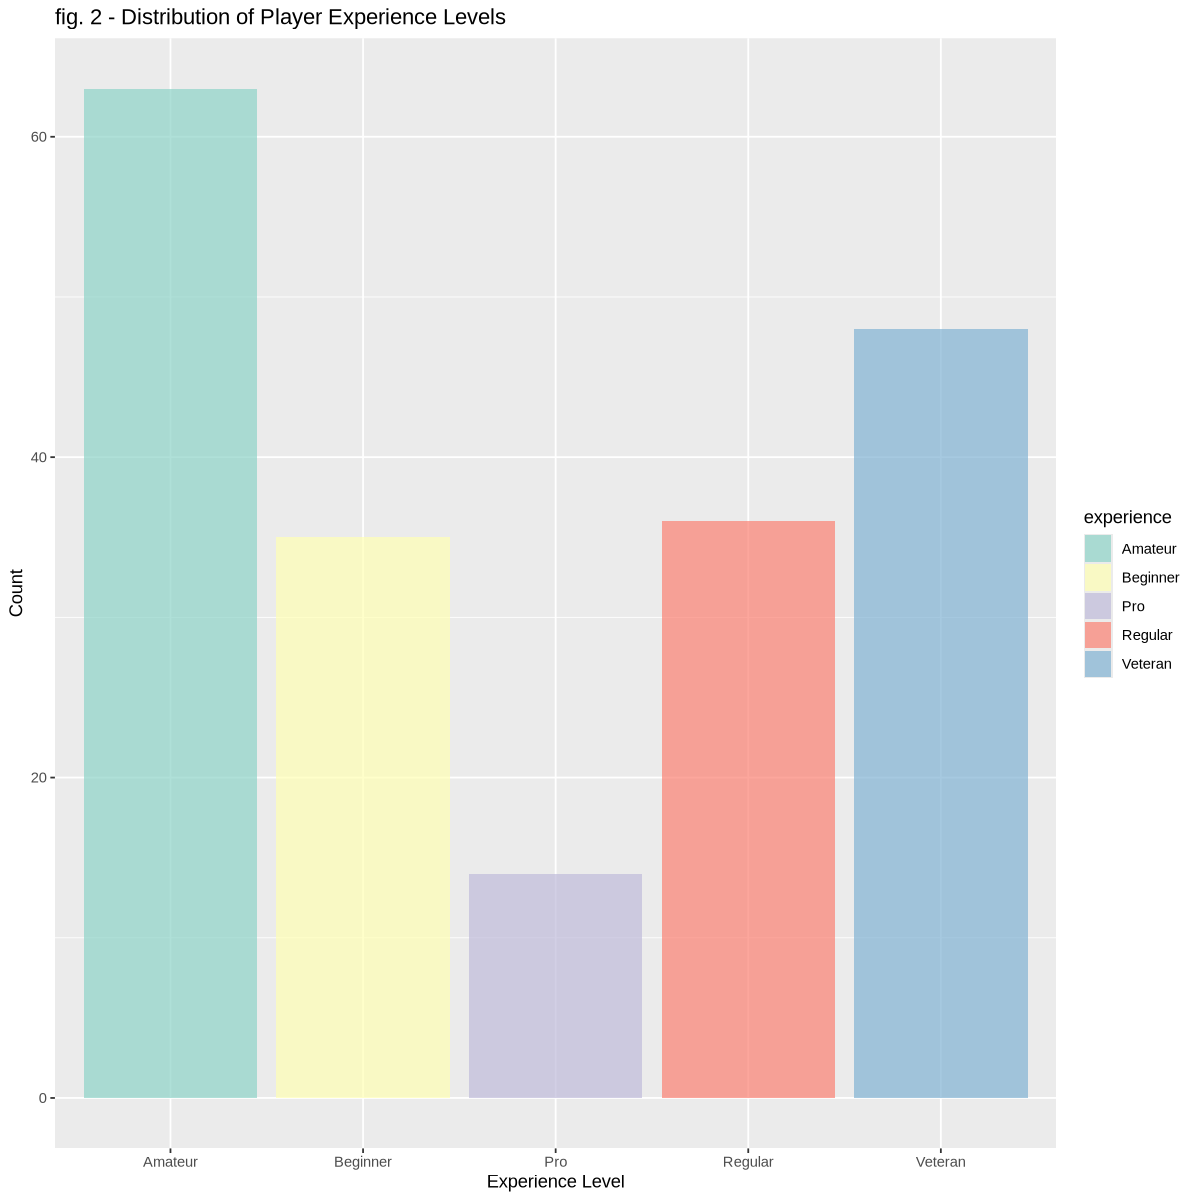

In [20]:
experience_bar<-ggplot(players_data, aes(x = experience, fill = experience)) +
  geom_bar(alpha = 0.7) +
  labs(title = "fig. 2 - Distribution of Player Experience Levels",
       x = "Experience Level",
       y = "Count") +
  scale_fill_brewer(palette = "Set3") 
experience_bar

**Box Plot of played hours and experience, with jitter and offset**

This visualization helps us understand the relation between the player’s experience and its correlation to the number of hours spent playing the game. 
The reason of using jitter is to ensure that overlapping points appear more spread about, so as to improve readability without hampering the underlying distribution. Offset was used to ensure no negative values or values approaching infinity were created when applying logarithmic transformation. 


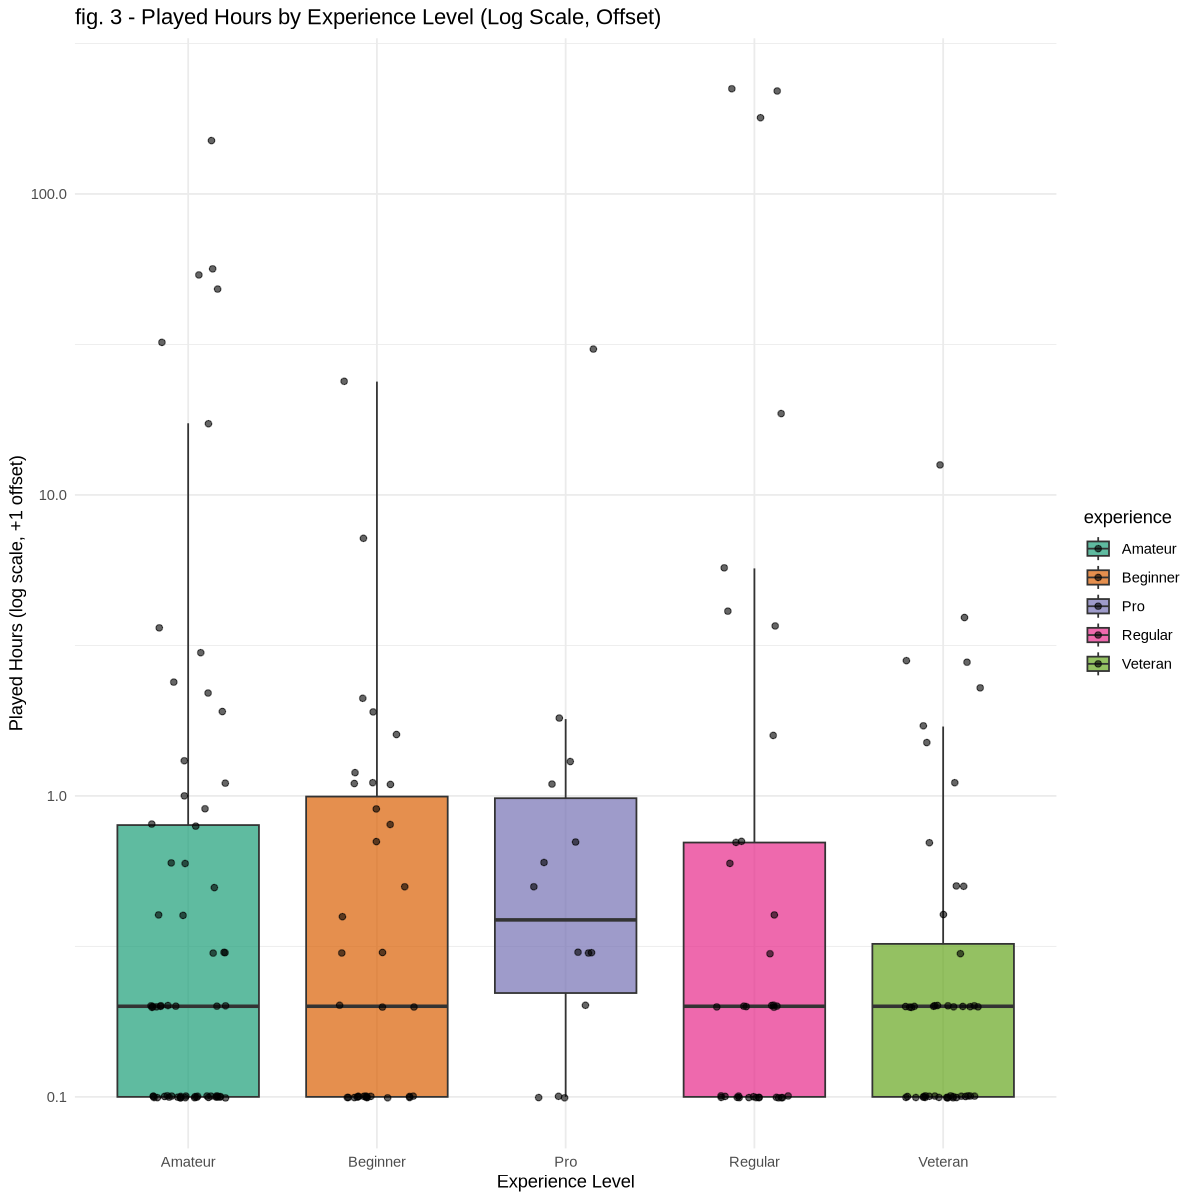

In [21]:
#Player experience v/s played hours 
ggplot(players_data, aes(x = experience, y = played_hours + 0.1, fill = experience)) +
  geom_boxplot(alpha = 0.7, outlier.shape = NA) +
  geom_jitter(width = 0.2, alpha = 0.6, color = "black") +
  scale_y_log10() +
  labs(title = "fig. 3 - Played Hours by Experience Level (Log Scale, Offset)",
       x = "Experience Level",
       y = "Played Hours (log scale, +1 offset)") +
  scale_fill_brewer(palette = "Dark2") +
  theme_minimal()

**Scatter Plot of hours played by age**

This scatter plot explores the relationship between player age and gameplay hours, showing potential trends or clusters.

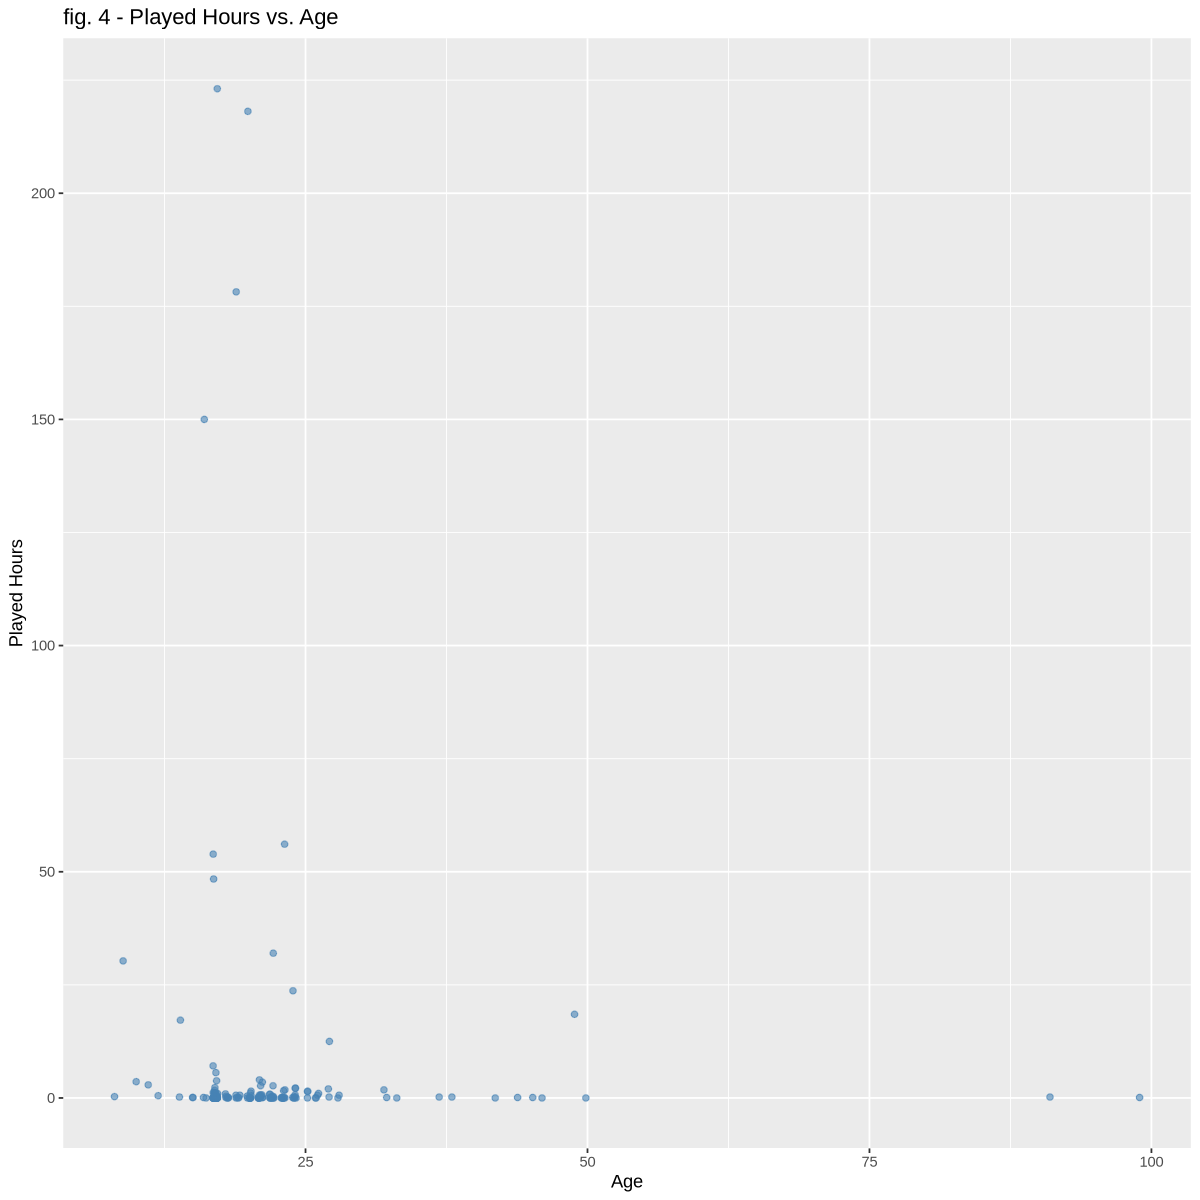

In [23]:
#Hours played by age
hours_by_age<-ggplot(players_data, aes(x = age, y = played_hours)) +
  geom_jitter(width = 0.2, height = 0, color = "steelblue", alpha = 0.6) +
  labs(title = "fig. 4 - Played Hours vs. Age",
       x = "Age",
       y = "Played Hours")
hours_by_age

# Analysis code
View in-cell comments for explanations.

In [16]:
#Reading appropriate libraries
library(repr)
library(tidymodels)
library(cowplot)
options(repr.matrix.max.rows = 6)

── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Use suppressPackageStartupMessages() to eliminate package startup messages


Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp




In [17]:

#Splitting the data 50/50--because the dataset is relatively small, we want to reserve a decent amount of data to be tested upon
set.seed(2019)
players_split <- initial_split(players_data, prop=0.5, strata= played_hours)  
players_training <- training(players_split)
players_testing <- testing(players_split)

#Creating a linear regression model
lm_spec <- linear_reg() |>
  set_engine("lm") |>
  set_mode("regression")

#Creating a linear regression recipe
lm_recipe <- recipe(played_hours ~ experience + subscribe + gender + age, data = 
players_training)

#Creating a linear regression workflow
lm_fit <- workflow() |>
       add_recipe(lm_recipe) |>
       add_model(lm_spec) |>
       fit(data = players_training)

#Rendering results from the workflow
lm_test_results <- lm_fit |>
         predict(players_testing) |>
         bind_cols(players_testing) |>
         metrics(truth = played_hours , estimate = .pred)

#Determining our RMSPE
lm_rmspe <- lm_test_results |>
          filter(.metric == "rmse") |>
          select(.estimate) |>
          pull()
lm_rmspe

[1] 28.47395

**Above is our listed RMSPE.**

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_line()`).”


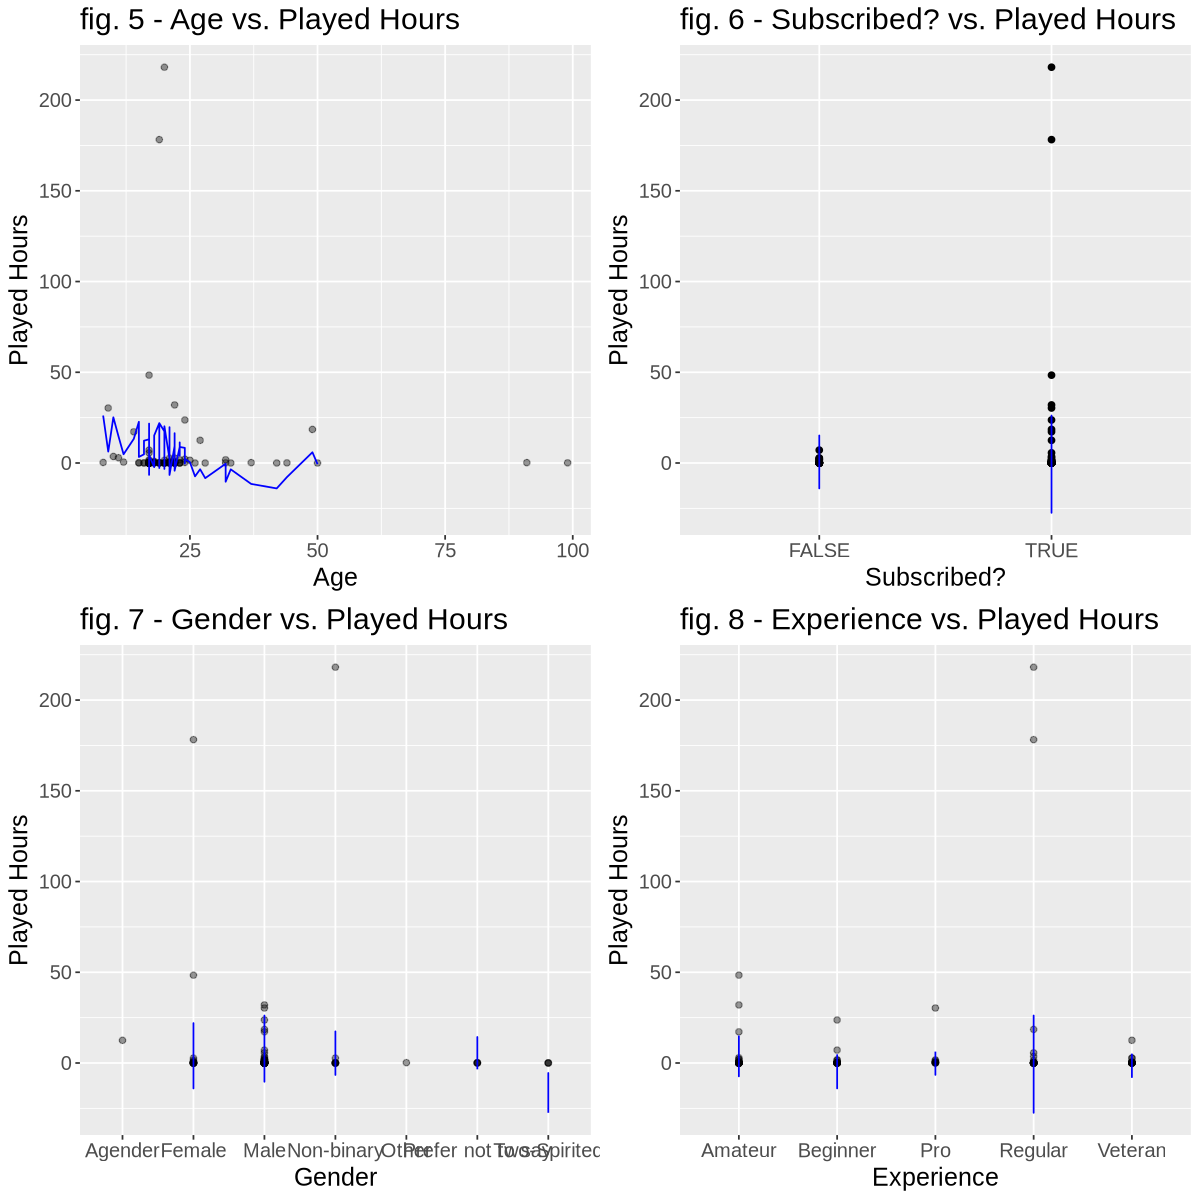

In [26]:
#Making predictions with our workflow
test_preds <- lm_fit |>
   predict(players_testing) |>
   bind_cols(players_testing)

#Plotting age-playtime predictions
age_plot <- test_preds |>
     ggplot(aes(x = age, y = played_hours)) +
         geom_point(alpha = 0.4) +
         geom_line(
             mapping = aes(x = age, y = .pred), 
             color = "blue") +
         xlab("Age") +
         ylab("Played Hours") +
        ggtitle("fig. 5 - Age vs. Played Hours") +
         theme(text = element_text(size = 15))

#Plotting subscription-playtime predictions
subscribe_plot <- test_preds |>
     ggplot(aes(x = subscribe, y = played_hours)) +
         geom_point() +
         geom_line(
             mapping = aes(x = subscribe, y = .pred), 
             color = "blue") +
         xlab("Subscribed?") +
         ylab("Played Hours") +
        ggtitle("fig. 6 - Subscribed? vs. Played Hours") + 
         theme(text = element_text(size = 15))

#Plotting gender-playtime predictions
gender_plot <- test_preds |>
     ggplot(aes(x = gender, y = played_hours)) +
         geom_point(alpha = 0.4) +
         geom_line(
             mapping = aes(x = gender, y = .pred), 
             color = "blue") +
         xlab("Gender") +
         ylab("Played Hours") +
        ggtitle("fig. 7 - Gender vs. Played Hours") +
         theme(text = element_text(size = 15))

#Plotting experience-playtime predictions
experience_plot <- test_preds |>
     ggplot(aes(x = experience, y = played_hours)) +
         geom_point(alpha = 0.4) +
         geom_line(
             mapping = aes(x = experience, y = .pred), 
             color = "blue") +
         xlab("Experience") +
         ylab("Played Hours") +
        ggtitle("fig. 8 - Experience vs. Played Hours") +
         theme(text = element_text(size = 15))

options(repr.plot.width = 10, repr.plot.height = 10)
library(gridExtra)
grid.arrange(age_plot, subscribe_plot, gender_plot, experience_plot, ncol=2, nrow =2)

# Discussion
**Summary of findings**

Our multiple linear regression analysis seemingly reveals that younger players tend to contribute more hours of playtime to the server than players above the age of 25, that players who are subscribed to PLAIcraft updates tend to contribute more hours of playtime than players who aren't, that male and female players tend to contribute more hours of playtime than non-binary, Two-Spirit, or undisclosed-gender players, and that players with a "regular" level of experience tend to contribute more hours of playtime than those at other levels. However, these results come from a prediction model with an RMSPE of about 28, meaning the average difference between predicted hours by a given variable and actual hours by a given variable averages at about 28 across all observations--this could be because the size of the dataset makes it hard to scale and standardize properly. This very high RMSPE makes the results of the model generally unreliable. If we assume, however, that the model is reliable, it communicates that an archetypal player profile researchers should target for their data is that of a <25 year old male or female who is subscribe to PLAIcraft updates and describes themself as a "regular" Minecraft player.

**Is this what we expected to find?**

We expected to see a distinct relationship between age and played hours (as well as subscription and experience to an extent) because we predicted that it might be directly related to interest in Minecraft as well as available time for playing Minecraft and exposure to PLAIcraft research (more likely to be university students). However, we did not distinctly or accurately predict the severity of these relationships.

**Impact of findings?**

The findings, despite their limitations, suggest a potential common profile for players who are most active on the PLAIcraft server. This can help developers, researchers, or community managers target specific demographics for engagement, content creation, or data collection. For example, focusing on younger players who are active subscribers and self-identified "regulars" could optimize community participation or research outcomes. However, the high RMSPE indicates that the predictive ability of this model can be weak, cautioning against over-reliance on these results for decision-making.

**Future questions this could lead to**

How can the dataset be improved to reduce RMSPE and increase reliability?

- Investigating potential biases in the dataset may improve the accuracy of the model's predictions.
  
What drives differences in playtime across gender categories?

- Future research could examine why non-binary, Two-Spirit, or undisclosed-gender players report fewer hours, potentially uncovering barriers to play or engagement.

How do outside influences (e.g., academic schedules, game updates, or cultural trends) affect playtime?

- Studying external factors could help determine whether trends in player behavior are seasonal or on-going.

How do other gaming habits or preferences influence hours of playtime?

- Examining players' habits in other games or platforms might help establish broader gaming profiles and preferences.
These questions could guide further studies and help refine predictive models for better reliability and useability of the data.

# Legend

1. Exploratory histogram depicting distribution of played hours (played_hours) from players.csv
2. Exploratory plot depicting distribution of reported player experience levels (experience) from players.csv
3. Exploratory plot depicting played hours (played_hours) by experience levels (experience) from players.csv
4. Exploratory scatterplot depicting played hours (played_hours) by reported age (age) 
5. Analysis plot depicting relationship between real and predicted ages (age) and played hours (played_hours) 
6. Analysis plot depicting relationship between real and predicted subscription status (subscribe) and played hours (played_hours) 
7. Analysis plot depicting relationship between real and predicted gender (gender) and played hours (played_hours) 
8. Analysis plot depicting relationship between real and predicted experience (experience) and played hours (played_hours) 